In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/international_matches.csv")

In [3]:
df.head()

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

In [6]:
df = df.dropna()

In [13]:
df['date'] = pd.to_datetime(df['date'])


In [15]:
categorical_columns = ['home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'tournament', 'city', 'country', 'shoot_out', 'home_team_result']
for col in categorical_columns:
    df[col] = df[col].astype('category').cat.codes

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [16]:
X = df.drop(['home_team_score', 'away_team_score'], axis=1)
y = df['home_team_result']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
def info(df):

    variables = []
    data_types = []
    count = []
    unique = []
    missing_values = []

    for item in df.columns:
        variables.append(item)
        data_types.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing_values.append(df[item].isna().sum())

    output = pd.DataFrame({
        'variable': variables,
        'data type': data_types,
        'count': count,
        'unique': unique,
        'missing values': missing_values
    })

    return output

In [21]:
info(df)

,variable,data type,count,unique,missing values
0,date,datetime64[ns],4303,1139,0
1,home_team,int8,4303,88,0
2,away_team,int8,4303,88,0
3,home_team_continent,int8,4303,6,0
4,away_team_continent,int8,4303,6,0
5,home_team_fifa_rank,int64,4303,131,0
6,away_team_fifa_rank,int64,4303,133,0
7,home_team_total_fifa_points,int64,4303,1089,0
8,away_team_total_fifa_points,int64,4303,1091,0
9,home_team_score,int64,4303,9,0


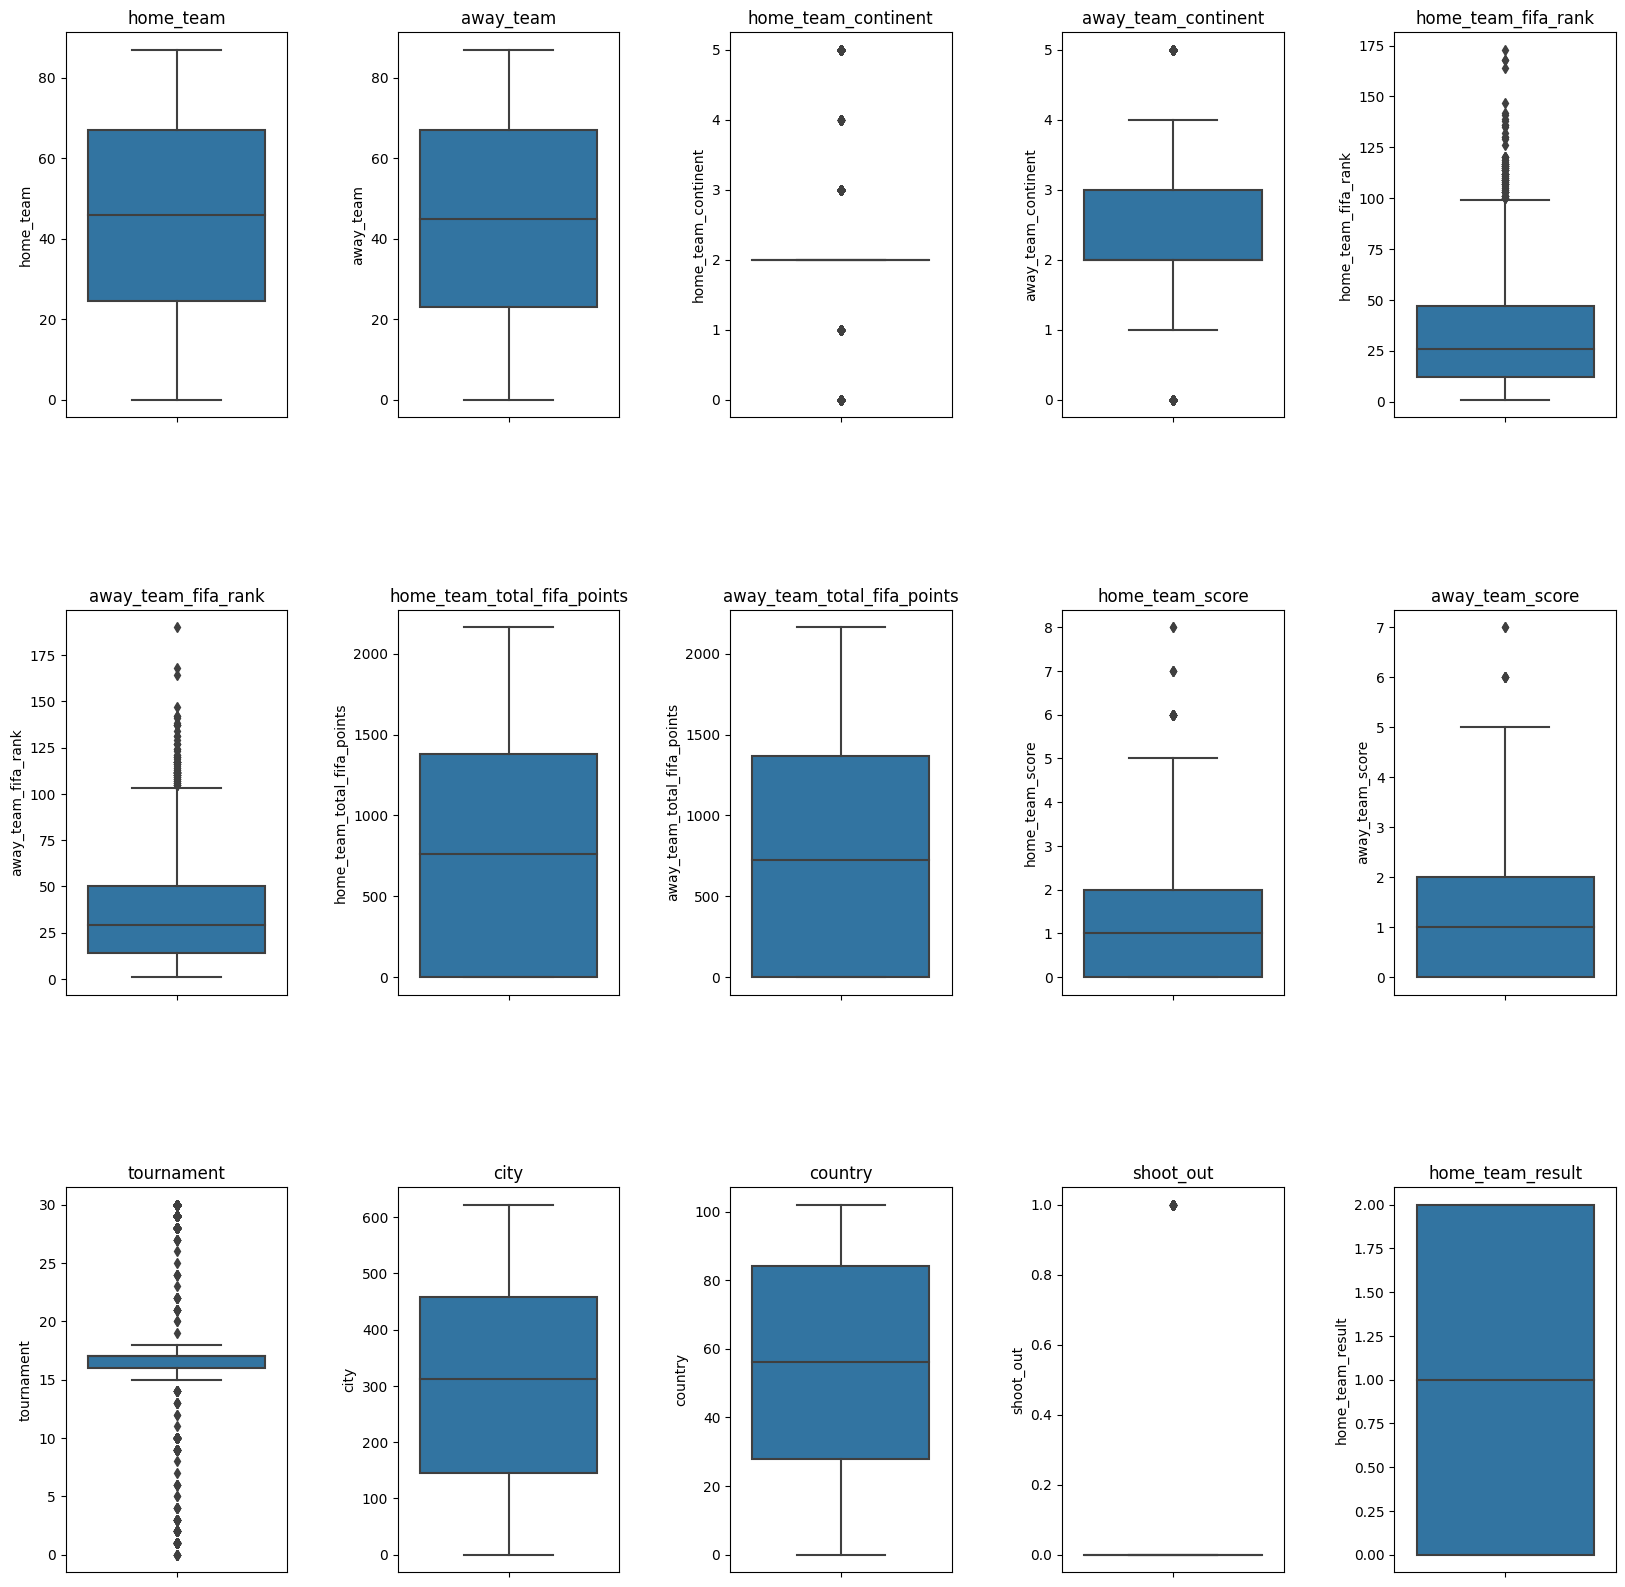

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, nrows=3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
numeric_cols = df.select_dtypes(include='number').columns

for i, ax in enumerate(axs.flatten()):
    if i < len(numeric_cols):
        sns.boxplot(y=df[numeric_cols[i]], ax=ax)
        ax.set_title(numeric_cols[i])
    else:
        break

plt.show()

In [23]:
df["goal_difference"] = df["home_team_score"] - df["away_team_score"]
df["rank_difference"] = df["home_team_fifa_rank"] - df["away_team_fifa_rank"]
df['Friendly'] = df['tournament'] == 'Friendly'
df['year'] = df['date'].dt.year

In [24]:
matches_X = df[['home_team_total_fifa_points', 'away_team_total_fifa_points', 'rank_difference', 'Friendly', 'year']]
matches_y = df[['goal_difference']]

random forest

In [26]:
import numpy as np

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [29]:
from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
y_array = np.array(matches_y)
y_array = y_array.ravel()
scores = cross_val_score(random_forest_model, matches_X, y_array, cv=10, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print("RMSE Scores:", rmse_scores)
print("Mean RMSE:", rmse_scores.mean())

RMSE Scores: [1.85824364 1.80644482 1.77046858 1.72052434 1.75780178 1.65310186
 1.74455367 1.79176255 1.62248015 1.71892097]
Mean RMSE: 1.7444302340971691


Decision Tree

In [30]:
decision_tree_reg = DecisionTreeRegressor(random_state=42)
scores = cross_val_score(decision_tree_reg, matches_X, matches_y, cv=10, scoring='neg_mean_squared_error')
decision_tree_rmse_scores = np.sqrt(-scores)
print('Decision Tree Regression RMSE Scores:', decision_tree_rmse_scores)
print('Decision Tree Regression RMSE Mean:', decision_tree_rmse_scores.mean())

Decision Tree Regression RMSE Scores: [2.01414324 2.19073534 2.1662246  2.17171445 2.36409676 2.40312297
 2.3370126  2.20886165 2.03444181 2.17103019]
Decision Tree Regression RMSE Mean: 2.2061383618269668


In [31]:
random_forest_model.fit(matches_X, y_array)

RandomForestRegressor(random_state=42)

In [32]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes_abs, train_scores, test_scores = learning_curve(
    random_forest_model, matches_X, y_array, train_sizes=train_sizes, cv=10, scoring='neg_root_mean_squared_error')

In [33]:
train_mean = -np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = -np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

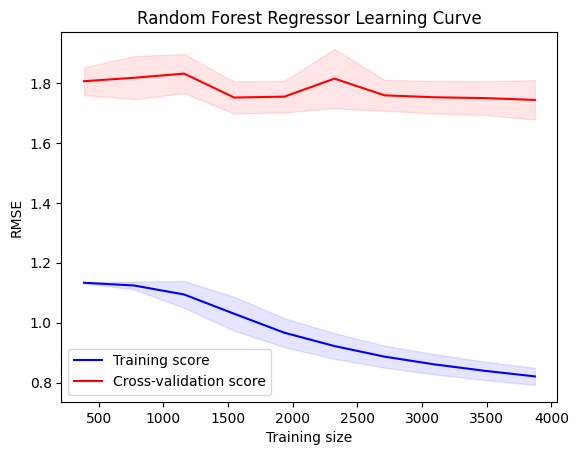

In [34]:
plt.plot(train_sizes_abs, train_mean, label='Training score', color='blue')
plt.fill_between(train_sizes_abs, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes_abs, test_mean, label='Cross-validation score', color='red')
plt.fill_between(train_sizes_abs, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')
plt.title('Random Forest Regressor Learning Curve')
plt.xlabel('Training size')
plt.ylabel('RMSE')
plt.legend(loc='best')
plt.show()

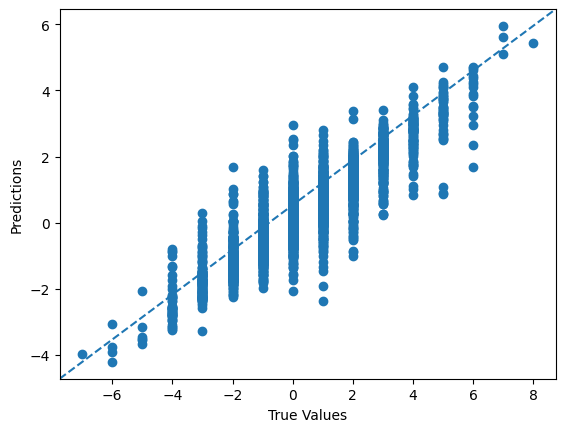

In [35]:
y_pred = random_forest_model.predict(matches_X)
plt.scatter(matches_y, y_pred)
plt.plot([0, 1], [0, 1], '--', transform=plt.gca().transAxes)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

which team has the overall strongest defense, midfield, and offense? You prediction may
be a probability of winning for the five teams, defense, midfields, and offense.

In [41]:
df['mean_defense'] = (df['home_team_mean_defense_score'] + df['away_team_mean_defense_score']) / 2
df['mean_midfield'] = (df['home_team_mean_midfield_score'] + df['away_team_mean_midfield_score']) / 2
df['mean_offense'] = (df['home_team_mean_offense_score'] + df['away_team_mean_offense_score']) / 2

In [43]:
team_stats = df.groupby('home_team')[['mean_defense', 'mean_midfield', 'mean_offense']].mean()


In [44]:
strongest_defense_team = team_stats['mean_defense'].idxmax()
strongest_midfield_team = team_stats['mean_midfield'].idxmax()
strongest_offense_team = team_stats['mean_offense'].idxmax()


In [45]:
print(f"Strongest Defense Team: {strongest_defense_team}")
print(f"Strongest Midfield Team: {strongest_midfield_team}")
print(f"Strongest Offense Team: {strongest_offense_team}")

Strongest Defense Team: 33
Strongest Midfield Team: 75
Strongest Offense Team: 3
